# Random Sample Imputation

Takes the random values from the column and replace the Nan values with it

used for mcar dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
# Replcaing Nan Values with random sampling
random_sample = df.Age.dropna().sample(df.Age.isnull().sum(), random_state=42)
random_sample
# Picks up a random value equivalent to total null value present

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [ ]:
#In order to merge the index should be same
random_sample.index = df[df.Age.isnull()].index
random_sample

5      42.0
17      3.0
19     29.0
26     24.0
28     43.0
       ... 
859    18.0
863    24.0
868     4.0
878    22.0
888    52.0
Name: Age, Length: 177, dtype: float64

In [ ]:
df["Age_random"] = df.Age
df.loc[df.Age.isnull(),"Age_random"] = random_sample
df.head(10)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,42.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [ ]:
df.Age_random.isnull().sum()

0

In [ ]:
df["Age_median"] = df.Age.fillna(df.Age.median())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

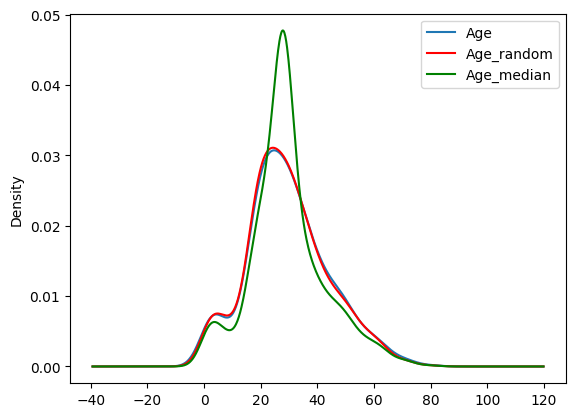

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
df.Age_median.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

**Observation**:
We can clearly see how sampling random is better that filling Nan with median.
The statistics like variance and Density remains same in case of random sampling

**Caution:**
If there are many missing values, In that case random sampling might fail

# Capturing NaN values with new feature

Works when dataset is following mnar characteristics

In [ ]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df["Age_Nan"] = np.where(df.Age.isnull(),1,0)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Basically Captures the importance of missing vaue

For eg: You replaced the Nan value with median/mean but you will still have a column specifing the missing nan values

**Caution:**
This keeps on creating Additional features


# End of distribution Imputation

In [ ]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

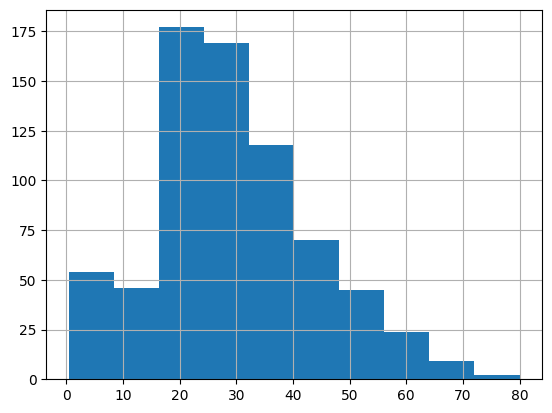

In [ ]:
df.Age.hist(bins=10)

In [ ]:
# Replace the Nan value with far end of the distribution
# This can be done picking up the data after 3rd stand deviation
df.Age.mean()

29.69911764705882

In [ ]:
extreme = df.Age.mean() + 3 * df.Age.std()
extreme

73.27860964406094

<Axes: xlabel='Age'>

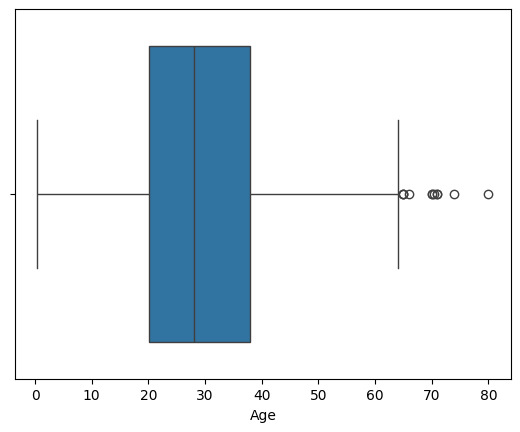

In [ ]:
import seaborn as sns
sns.boxplot(data=df,x='Age')

In [ ]:
df["Age_extreme"] = df.Age.fillna(extreme)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [ ]:
df["Age_median"] = df.Age.fillna(df.Age.median())

<Axes: >

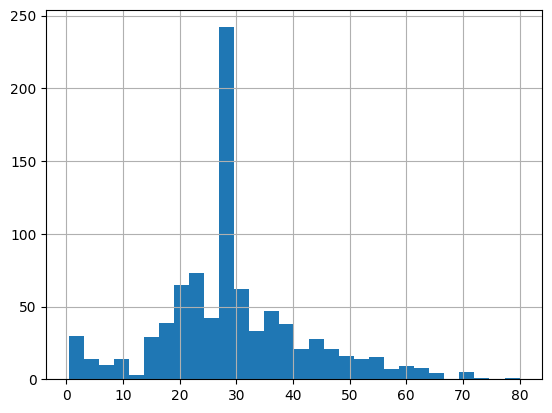

In [ ]:
df.Age_median.hist(bins=30)

<Axes: >

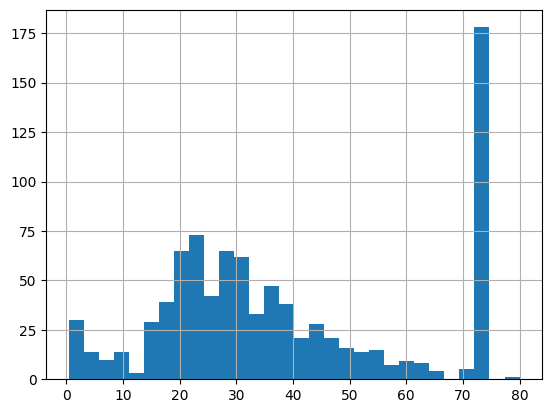

In [ ]:
df.Age_extreme.hist(bins=30)

<Axes: xlabel='Age_extreme'>

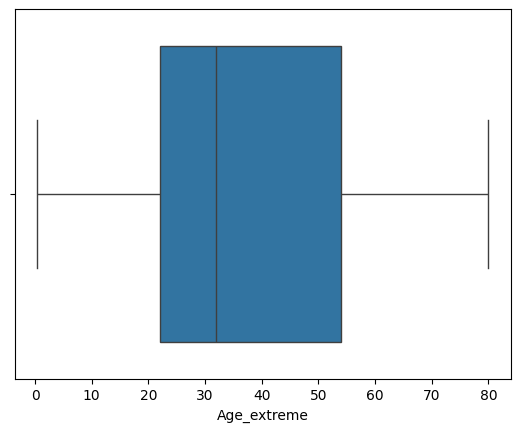

In [ ]:
sns.boxplot(data=df,x='Age_extreme')

<Axes: xlabel='Age_median'>

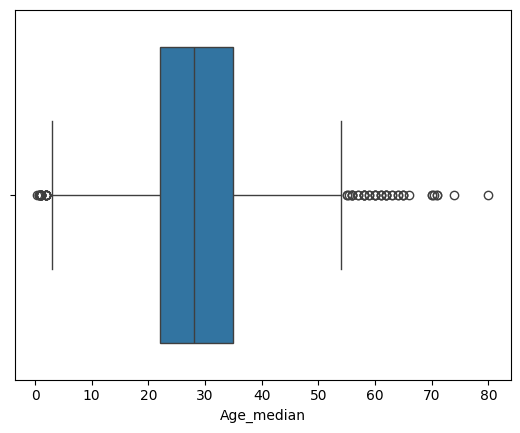

In [ ]:
sns.boxplot(data=df,x='Age_median')

**Observation:**
The outliers get captured when we use end of distribution imputation